My Content est une start-up qui veut encourager la lecture en recommandant des contenus pertinents pour ses utilisateurs.

![mycontent](img/my_content.png)

L'objectif est de un premier MVP qui prendra la forme d’une application. 

Dans un premier temps, notre start-up souhaite tester une solution de recommandation d’articles et de livres à des particuliers.

Nous utiliserons un jeu de données fournis à cette adresse :https://www.kaggle.com/gspmoreira/news-portal-user-interactions-by-globocom#clicks_sample.csv.

Commençons notre analyse exploratoire.

# Analyse exploratoire

## Import des librairies

In [1]:
import os
from pathlib import Path
import pickle

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Jeu de données

L'ensemble de données contient un échantillon d'interactions d'utilisateurs (pages vues) sur le portail d'actualités G1 du 1er au 16 octobre 2017, comprenant environ 3 millions de clics, répartis sur plus d'un million de sessions de la part de 314 000 utilisateurs qui ont lu plus de 46 000 articles d'actualité différents pendant cette période. Il est composé de trois fichiers/dossiers :

- **clicks.zip** : dossier avec des fichiers CSV (un par heure), contenant les interactions des sessions utilisateur dans le portail de nouvelles ;
- **articles_metadata.csv** : fichier CSV avec des informations de métadonnées sur tous les (364047) articles publiés ;
- **articles_embeddings.pickle** : pickle (Python 3) d'une matrice NumPy contenant les incorporations de contenu d'article (vecteurs de 250 dimensions), formées sur le texte et les métadonnées des articles par le module ACR de CHAMELEON (voir l'article pour plus de détails) pour 364047 articles publiés.

In [2]:
articles_metadata = pd.read_csv('data/articles_metadata.csv')
clicks_sample = pd.read_csv('data/clicks_sample.csv')

In [3]:
articles_metadata

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162
...,...,...,...,...,...
364042,364042,460,1434034118000,0,144
364043,364043,460,1434148472000,0,463
364044,364044,460,1457974279000,0,177
364045,364045,460,1515964737000,0,126


In [4]:
clicks_sample

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1878,705,1506828968165442,1506828968000,2,119592,1506830912301,4,1,17,1,21,2
1879,705,1506828968165442,1506828968000,2,284847,1506830942301,4,1,17,1,21,2
1880,706,1506828979881443,1506828979000,3,108854,1506829027334,4,3,2,1,25,1
1881,706,1506828979881443,1506828979000,3,96663,1506829095732,4,3,2,1,25,1


- **user_id** : ID de l'utilisateur
- **session_id** : ID de la session
- **session_start** : Début de la session (timestamp)
- **session_size** : nombre de clics/session
- **words_count** : Nombre total de mots contenus dans l'article
- **click_article_id** : ID de l'article sur lequel l'utilisateur a cliqué
- **click_timestamp** : date à laquelle l'utilisateur a cliqué (timestamp)
- **click_environment** : environnement de l'utilisateur au moment du clic
- **click_deviceGroup** : périphérique de l'utilisateur
- **click_os** : système d'exploitation de l'utilisateur
- **click_country** : localisation (pays) lorsque l'utilisateur a cliqué
- **click_region** : localisation (région) lorsque l'utilisateur a cliqué
- **click_referrer_type** : Aucunes informations sur cette variable

Nous allons rassembler tous les CSV du dossier zip 'clicks' dans une seule dataframe.

In [5]:
liste_csv = os.listdir('data/clicks')
liste_csv

['clicks_hour_000.csv',
 'clicks_hour_001.csv',
 'clicks_hour_002.csv',
 'clicks_hour_003.csv',
 'clicks_hour_004.csv',
 'clicks_hour_005.csv',
 'clicks_hour_006.csv',
 'clicks_hour_007.csv',
 'clicks_hour_008.csv',
 'clicks_hour_009.csv',
 'clicks_hour_010.csv',
 'clicks_hour_011.csv',
 'clicks_hour_012.csv',
 'clicks_hour_013.csv',
 'clicks_hour_014.csv',
 'clicks_hour_015.csv',
 'clicks_hour_016.csv',
 'clicks_hour_017.csv',
 'clicks_hour_018.csv',
 'clicks_hour_019.csv',
 'clicks_hour_020.csv',
 'clicks_hour_021.csv',
 'clicks_hour_022.csv',
 'clicks_hour_023.csv',
 'clicks_hour_024.csv',
 'clicks_hour_025.csv',
 'clicks_hour_026.csv',
 'clicks_hour_027.csv',
 'clicks_hour_028.csv',
 'clicks_hour_029.csv',
 'clicks_hour_030.csv',
 'clicks_hour_031.csv',
 'clicks_hour_032.csv',
 'clicks_hour_033.csv',
 'clicks_hour_034.csv',
 'clicks_hour_035.csv',
 'clicks_hour_036.csv',
 'clicks_hour_037.csv',
 'clicks_hour_038.csv',
 'clicks_hour_039.csv',
 'clicks_hour_040.csv',
 'clicks_hour_04

In [6]:
%%time
dict_df = {}
for i in liste_csv:
    click_csv = pd.read_csv('data/clicks/'+i)
    dict_df[i] = click_csv

clicks_df = pd.concat(dict_df.values(), ignore_index=True)
clicks_df

CPU times: total: 3.94 s
Wall time: 4.24 s


,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2988176,10051,1508211372158328,1508211372000,2,84911,1508211557302,4,3,2,1,25,1
2988177,322896,1508211376302329,1508211376000,2,30760,1508211672520,4,1,17,1,25,2
2988178,322896,1508211376302329,1508211376000,2,157507,1508211702520,4,1,17,1,25,2
2988179,123718,1508211379189330,1508211379000,2,234481,1508211513583,4,3,2,1,25,2


Nous allons changer les formats des colonnes 'session_start' et 'click_timestamp' en format de date.

In [7]:
colonnes = ['session_start', 'click_timestamp']
for i in colonnes:
    clicks_df[i] = pd.to_datetime(clicks_df[i], unit='ms')

In [8]:
clicks_df.head(5)

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,2017-10-01 02:37:03,2,157541,2017-10-01 03:00:28.020,4,3,20,1,20,2
1,0,1506825423271737,2017-10-01 02:37:03,2,68866,2017-10-01 03:00:58.020,4,3,20,1,20,2
2,1,1506825426267738,2017-10-01 02:37:06,2,235840,2017-10-01 03:03:37.951,4,1,17,1,16,2
3,1,1506825426267738,2017-10-01 02:37:06,2,96663,2017-10-01 03:04:07.951,4,1,17,1,16,2
4,2,1506825435299739,2017-10-01 02:37:15,2,119592,2017-10-01 03:04:50.575,4,1,17,1,24,2


In [9]:
clicks_df.nunique()

user_id                 322897
session_id             1048594
session_start           646874
session_size                72
click_article_id         46033
click_timestamp        2983198
click_environment            3
click_deviceGroup            5
click_os                     8
click_country               11
click_region                28
click_referrer_type          7
dtype: int64

Nous constatons quelque chose d'intéressant : nous avons seulement 46 033 articles consultés sur 364047 articles. 

Cela devra sûrement être pris en compte par la suite. Voyons maintenant la période de nos données.

In [10]:
print(clicks_df.session_start.min())
print(clicks_df.session_start.max())

2017-10-01 02:37:03
2017-10-17 03:36:19


In [11]:
print(clicks_df.click_timestamp.min())
print(clicks_df.click_timestamp.max())

2017-10-01 03:00:00.026000
2017-11-13 20:04:14.886000


Les premières interactions des sessions commencent le **1er octobre 2017 et se terminent le 17 octobre 2017**. Par contre, les durées des sessions vont du **1er octobre au 13 novembre 2017**. 

Cela peut paraître étrange : si les sessions se terminent le 17 octobre, comment la durée d'une session peut aller jusqu'au 13 novembre ? Nous verrons cela plus tard.

### Métadonnées

Parcourons le csv contenant les métadonnées.

In [12]:
articles_metadata

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162
...,...,...,...,...,...
364042,364042,460,1434034118000,0,144
364043,364043,460,1434148472000,0,463
364044,364044,460,1457974279000,0,177
364045,364045,460,1515964737000,0,126


Nous avons ici 5 colonnes :
- **article_id**: l'id de l'article
- **category_id**: l'id de la catégorie de l'article
- **created_at_ts**: la date de publication de l'article
- **publisher_id**: l'id de l'éditeur de l'article
- **words_count**: la quantité de mots par article

Nous allons formater la colonne 'created_at_ts' au format date.

In [13]:
articles_metadata['created_at_ts'] = pd.to_datetime(articles_metadata['created_at_ts'], unit='ms')
articles_metadata.rename(columns = {'article_id' : 'click_article_id'}, inplace = True)
articles_metadata.head(5)

,click_article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,2017-12-13 05:53:39,0,168
1,1,1,2014-07-14 12:45:36,0,189
2,2,1,2014-08-22 00:35:06,0,250
3,3,1,2014-08-19 17:11:53,0,230
4,4,1,2014-08-03 13:06:11,0,162


## Embedding des mots des articles

Le Word embedding représente généralement le poids des mots utilisés dans l'articles, par exemple, on pourrait s’attendre à ce que les mots « chien » et « chat » soient représentés par des vecteurs relativement peu distants dans l’espace vectoriel où sont définis ces vecteurs.

Chargeons le fichier **'articles_embeddings.pickle'** fourni dans notre jeu de données.

In [14]:
with open('data/articles_embeddings.pickle', 'rb') as file:
    embedding = pickle.load(file)

df_embeddings = pd.DataFrame(embedding)
df_embeddings = df_embeddings.add_prefix('dimension_')

df_embeddings.to_csv('data/df_embeddings.csv', index=False)
# Display shape and 5 first rows
print('Embeddings des articles: ', df_embeddings.shape)
df_embeddings.head()

Embeddings des articles:  (364047, 250)


,dimension_0,dimension_1,dimension_2,dimension_3,dimension_4,dimension_5,dimension_6,dimension_7,dimension_8,dimension_9,...,dimension_240,dimension_241,dimension_242,dimension_243,dimension_244,dimension_245,dimension_246,dimension_247,dimension_248,dimension_249
0,-0.161183,-0.957233,-0.137944,0.050855,0.830055,0.901365,-0.335148,-0.559561,-0.500603,0.165183,...,0.321248,0.313999,0.636412,0.169179,0.540524,-0.813182,0.286870,-0.231686,0.597416,0.409623
1,-0.523216,-0.974058,0.738608,0.155234,0.626294,0.485297,-0.715657,-0.897996,-0.359747,0.398246,...,-0.487843,0.823124,0.412688,-0.338654,0.320787,0.588643,-0.594137,0.182828,0.397090,-0.834364
2,-0.619619,-0.972960,-0.207360,-0.128861,0.044748,-0.387535,-0.730477,-0.066126,-0.754899,-0.242004,...,0.454756,0.473184,0.377866,-0.863887,-0.383365,0.137721,-0.810877,-0.447580,0.805932,-0.285284
3,-0.740843,-0.975749,0.391698,0.641738,-0.268645,0.191745,-0.825593,-0.710591,-0.040099,-0.110514,...,0.271535,0.036040,0.480029,-0.763173,0.022627,0.565165,-0.910286,-0.537838,0.243541,-0.885329
4,-0.279052,-0.972315,0.685374,0.113056,0.238315,0.271913,-0.568816,0.341194,-0.600554,-0.125644,...,0.238286,0.809268,0.427521,-0.615932,-0.503697,0.614450,-0.917760,-0.424061,0.185484,-0.580292


## Profile utilisateur 

Pour recommander des articles à un utilisateur, nous devons établir son profil. Grâce à cela, le modèle connaîtra quels sont les intérêts de cet utilisateur. Nous allons pour cela utiliser différents types de données chez l'utilisateur :

- les **données explicites**, comme par exemple liker ou partager un article ;
- et les **données implicites**, qui proviennent non pas d'une action volontaire d'être intéressé par un article, mais de données « non volontaires », comme par exemple l'historique de navigation ou de recherche, des clics sur les articles, des téléchargements, la durée de consultation d'un article, la plateforme utilisée, etc.

### Sessions

In [15]:
nombre_session_utilisateur = clicks_df.groupby(['user_id'])['session_id'].nunique()
nombre_session_utilisateur.head(5)

user_id
0    4
1    6
2    2
3    6
4    3
Name: session_id, dtype: int64

In [16]:
print(nombre_session_utilisateur.min())
print(nombre_session_utilisateur.mean())
print(nombre_session_utilisateur.max())

1
3.247456619293459
207


In [17]:
print(clicks_df['session_size'].min())
print(clicks_df['session_size'].mean())
print(clicks_df['session_size'].max())

2
3.9018851267711026
124


Les utilisateurs ont en moyenne trois sessions. 

Les utilisateurs consultent en moyenne quatre articles par session.

### Géographie

In [18]:
clicks_df.groupby('click_country')['user_id'].nunique()

click_country
1     310017
2        679
3        512
4        398
5        457
6        826
7        446
8        905
9        864
10      6535
11      3588
Name: user_id, dtype: int64

Il y a le plus d'utilisateurs dans le pays numéro un, ces données pourront peut-être être utiles dans la recommandation d'articles, si un utilisateur est intéressé par l'actualité de son pays, par exemple.

### Date de consultation

In [19]:
session_start_df = clicks_df['session_start'].dt.strftime('%d/%m/%a')
session_start_df.head(5)

0    01/10/Sun
1    01/10/Sun
2    01/10/Sun
3    01/10/Sun
4    01/10/Sun
Name: session_start, dtype: object

In [20]:
session_startday_df = clicks_df['session_start'].dt.strftime('%a')
session_startday_df.head(5)

0    Sun
1    Sun
2    Sun
3    Sun
4    Sun
Name: session_start, dtype: object

<AxesSubplot: >

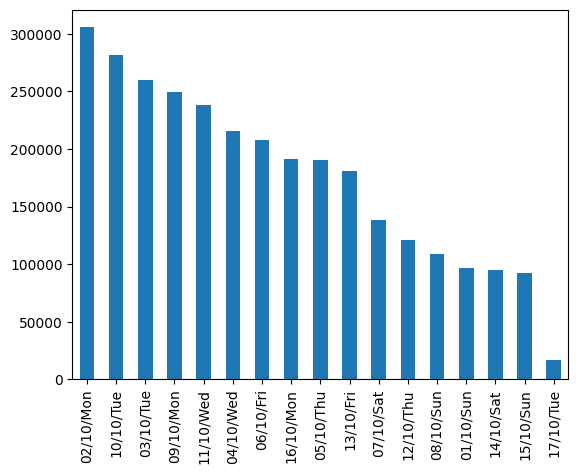

In [21]:
session_start_df.value_counts().plot.bar()

<AxesSubplot: >

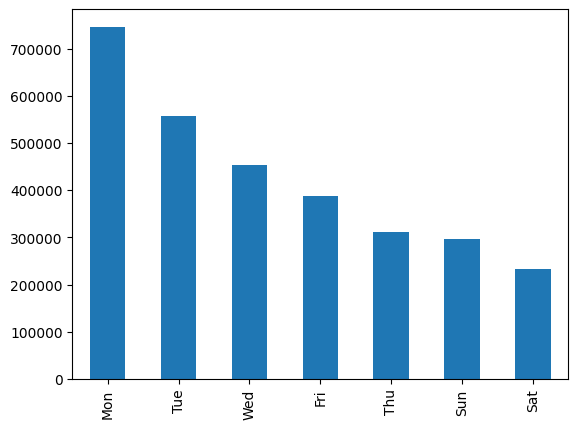

In [22]:
session_startday_df.value_counts().plot.bar()

La début de semaine est plus active que la fin de semaine.

### Catégories des articles

Voyons maintenant les catégories.

In [23]:
articles_categories = pd.merge(clicks_df, articles_metadata, how='inner', on='click_article_id')
articles_categories

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,category_id,created_at_ts,publisher_id,words_count
0,0,1506825423271737,2017-10-01 02:37:03,2,157541,2017-10-01 03:00:28.020,4,3,20,1,20,2,281,2017-09-30 19:41:58,0,280
1,20,1506825727279757,2017-10-01 02:42:07,2,157541,2017-10-01 05:42:28.634,4,1,17,1,9,1,281,2017-09-30 19:41:58,0,280
2,44,1506826139185781,2017-10-01 02:48:59,5,157541,2017-10-01 11:27:58.141,4,1,17,1,12,1,281,2017-09-30 19:41:58,0,280
3,45,1506826142324782,2017-10-01 02:49:02,2,157541,2017-10-01 03:08:29.970,4,1,17,1,17,1,281,2017-09-30 19:41:58,0,280
4,76,1506826463226813,2017-10-01 02:54:23,2,157541,2017-10-01 03:33:43.469,4,3,2,1,21,1,281,2017-09-30 19:41:58,0,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988176,195186,1508210422411129,2017-10-17 03:20:22,4,2221,2017-10-17 03:21:09.562,4,3,2,1,1,1,1,2017-10-16 22:21:09,0,103
2988177,75658,1508210696185183,2017-10-17 03:24:56,4,271117,2017-10-17 03:29:11.703,4,1,17,1,4,2,399,2017-09-01 14:27:41,0,156
2988178,217129,1508210976336246,2017-10-17 03:29:36,2,20204,2017-10-17 03:29:50.810,4,3,2,1,21,5,9,2017-04-11 18:13:30,0,242
2988179,217129,1508210976336246,2017-10-17 03:29:36,2,70196,2017-10-17 03:30:20.810,4,3,2,1,21,5,136,2017-04-04 09:34:55,0,206


In [24]:
articles_categories_sort = articles_categories.groupby(
    'category_id')['click_article_id'].nunique().sort_values(ascending=False)
top10 = articles_categories_sort.head(10)
top10

category_id
281    1899
375    1728
412    1497
228    1290
26     1081
399    1042
209     906
431     892
428     891
67      840
Name: click_article_id, dtype: int64

<AxesSubplot: xlabel='category_id'>

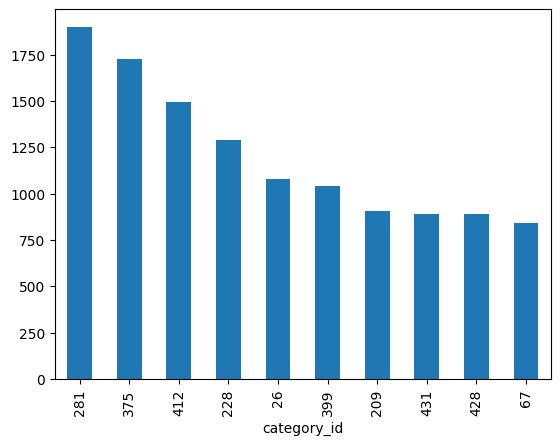

In [25]:
top10.plot.bar()

Nous avons des catégories d'articles beaucoup plus consultées que d'autres, peut-être des faits d'actualité ou du sport qui sont les centres d'intérêt de beaucoup de monde.

### Quantité de mots

In [26]:
print(articles_metadata['words_count'].min())
print(articles_metadata['words_count'].mean())
print(articles_metadata['words_count'].max())

0
190.89772749123054
6690


La moyenne de mots par article est de 190. Nous avons des articles contenant 0 mot ? Voyons quels sont les articles concernés.

In [27]:
articles_metadata[articles_metadata['words_count'] == 0]

,click_article_id,category_id,created_at_ts,publisher_id,words_count
35491,35491,43,2016-08-04 09:42:02,0,0
38472,38472,51,2011-04-21 21:22:43,0,0
39043,39043,64,2014-06-30 20:02:35,0,0
39054,39054,64,2015-01-21 21:30:33,0,0
164414,164414,288,2015-03-30 08:30:23,0,0
206233,206233,331,2017-09-30 17:11:56,0,0
212323,212323,343,2010-04-19 10:36:16,0,0
212324,212324,343,2010-04-16 18:49:55,0,0
212327,212327,343,2014-08-11 20:23:05,0,0
212526,212526,347,2018-01-28 19:38:55,0,0


La majorité des articles contenant 0 mot sont de la catégorie 431.

## Conclusion

Le dataset ne contient que des données implicites. Sans réponse directe de l’utilisateur, nous devons utiliser des indices sur la satisfaction de son expérience, le nombre de clique.

In [28]:
articles_categories.to_csv('data/articles_categories.csv', index=False)